In [3]:
import pandas as pd


df = pd.read_csv(r"C:\Users\divya\Downloads\Clean_Dataset\ford.csv")
df.head()



,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [4]:
df.nunique()



model              24
year               23
price            3511
transmission        3
mileage         13528
fuelType            5
tax                36
mpg                90
engineSize         16
dtype: int64

In [6]:
df['mpg'] = df['mpg'].mul(0.425144)

In [7]:
df['mpg'] = df['mpg'].round(3)

In [8]:
df = df.rename(columns={'mpg': 'kmpl'})

In [12]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  17966 non-null  object 
 4   mileage       17966 non-null  int64  
 5   fuelType      17966 non-null  object 
 6   tax           17966 non-null  int64  
 7   kmpl          17966 non-null  float64
 8   engineSize    17966 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


In [16]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,kmpl,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,24.531,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,24.531,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,24.531,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,17.133,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,20.705,1.0


In [24]:
Model=df.groupby(['model'])['price'].mean().sort_values().index

In [25]:
Model

Index([' Streetka', ' Fusion', ' Escort', ' KA', ' B-MAX', 'Focus', ' Ka+',
       ' C-MAX', ' Fiesta', ' Grand C-MAX', ' Mondeo', ' Transit Tourneo',
       ' EcoSport', ' Focus', ' Tourneo Connect', ' Ranger',
       ' Grand Tourneo Connect', ' Kuga', ' S-MAX', ' Galaxy',
       ' Tourneo Custom', ' Puma', ' Edge', ' Mustang'],
      dtype='object', name='model')

In [28]:
dict_model = {key:index for index , key in enumerate(Model,0)}

In [29]:
dict_model

{' Streetka': 0,
 ' Fusion': 1,
 ' Escort': 2,
 ' KA': 3,
 ' B-MAX': 4,
 'Focus': 5,
 ' Ka+': 6,
 ' C-MAX': 7,
 ' Fiesta': 8,
 ' Grand C-MAX': 9,
 ' Mondeo': 10,
 ' Transit Tourneo': 11,
 ' EcoSport': 12,
 ' Focus': 13,
 ' Tourneo Connect': 14,
 ' Ranger': 15,
 ' Grand Tourneo Connect': 16,
 ' Kuga': 17,
 ' S-MAX': 18,
 ' Galaxy': 19,
 ' Tourneo Custom': 20,
 ' Puma': 21,
 ' Edge': 22,
 ' Mustang': 23}

In [34]:
df['model'] =df['model'].map(dict_model)

In [38]:
df['model']

0         8
1        13
2        13
3         8
4         8
         ..
17961     4
17962     4
17963    13
17964     3
17965     5
Name: model, Length: 17966, dtype: int64

In [48]:
df

,model,year,price,transmission,mileage,fuelType,tax,kmpl,engineSize
0,8,2017,12000,Automatic,15944,Petrol,150,24.531,1.0
1,13,2018,14000,Manual,9083,Petrol,150,24.531,1.0
2,13,2017,13000,Manual,12456,Petrol,150,24.531,1.0
3,8,2019,17500,Manual,10460,Petrol,145,17.133,1.5
4,8,2019,16500,Automatic,1482,Petrol,145,20.705,1.0
...,...,...,...,...,...,...,...,...,...
17961,4,2017,8999,Manual,16700,Petrol,150,20.024,1.4
17962,4,2014,7499,Manual,40700,Petrol,30,24.531,1.0
17963,13,2015,9999,Manual,7010,Diesel,20,28.612,1.6
17964,3,2018,8299,Manual,5007,Petrol,145,24.531,1.2


In [50]:
for sub_cat in df['transmission'].unique():
    df['transmission_'+sub_cat]= df['transmission'].apply(lambda x:1 if x==sub_cat else 0)

In [51]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,kmpl,engineSize,transmission_Automatic,transmission_Manual,transmission_Semi-Auto
0,8,2017,12000,Automatic,15944,Petrol,150,24.531,1.0,1,0,0
1,13,2018,14000,Manual,9083,Petrol,150,24.531,1.0,0,1,0
2,13,2017,13000,Manual,12456,Petrol,150,24.531,1.0,0,1,0
3,8,2019,17500,Manual,10460,Petrol,145,17.133,1.5,0,1,0
4,8,2019,16500,Automatic,1482,Petrol,145,20.705,1.0,1,0,0


In [65]:
df = df.drop('transmission',axis=1)

In [71]:
df = df.drop('fuelType_Electric',axis=1)

In [62]:
df['fuelType'].value_counts()

fuelType
Petrol      12179
Diesel       5762
Hybrid         22
Electric        2
Other           1
Name: count, dtype: int64

In [72]:
df

,model,year,price,mileage,fuelType,tax,kmpl,engineSize,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Petrol,fuelType_Diesel,fuelType_Hybrid
0,8,2017,12000,15944,Petrol,150,24.531,1.0,1,0,0,1,0,0
1,13,2018,14000,9083,Petrol,150,24.531,1.0,0,1,0,1,0,0
2,13,2017,13000,12456,Petrol,150,24.531,1.0,0,1,0,1,0,0
3,8,2019,17500,10460,Petrol,145,17.133,1.5,0,1,0,1,0,0
4,8,2019,16500,1482,Petrol,145,20.705,1.0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17961,4,2017,8999,16700,Petrol,150,20.024,1.4,0,1,0,1,0,0
17962,4,2014,7499,40700,Petrol,30,24.531,1.0,0,1,0,1,0,0
17963,13,2015,9999,7010,Diesel,20,28.612,1.6,0,1,0,0,1,0
17964,3,2018,8299,5007,Petrol,145,24.531,1.2,0,1,0,1,0,0


In [75]:
df=df.drop(df[df['fuelType'] == 'Electric'].index)

In [76]:
df


,model,year,price,mileage,fuelType,tax,kmpl,engineSize,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Petrol,fuelType_Diesel,fuelType_Hybrid
0,8,2017,12000,15944,Petrol,150,24.531,1.0,1,0,0,1,0,0
1,13,2018,14000,9083,Petrol,150,24.531,1.0,0,1,0,1,0,0
2,13,2017,13000,12456,Petrol,150,24.531,1.0,0,1,0,1,0,0
3,8,2019,17500,10460,Petrol,145,17.133,1.5,0,1,0,1,0,0
4,8,2019,16500,1482,Petrol,145,20.705,1.0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17961,4,2017,8999,16700,Petrol,150,20.024,1.4,0,1,0,1,0,0
17962,4,2014,7499,40700,Petrol,30,24.531,1.0,0,1,0,1,0,0
17963,13,2015,9999,7010,Diesel,20,28.612,1.6,0,1,0,0,1,0
17964,3,2018,8299,5007,Petrol,145,24.531,1.2,0,1,0,1,0,0


In [79]:
df=df.drop('fuelType',axis=1)

In [85]:
df['model'].value_counts()

model
8     6557
13    4588
17    2225
12    1143
7      543
6      531
10     523
4      355
18     296
9      247
19     228
22     208
3      199
21      80
20      69
16      59
23      57
14      33
1       16
0        2
15       1
2        1
11       1
5        1
Name: count, dtype: int64

In [99]:
df=df.sort_values(by=['price'])

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot(dp,col):
    fig , (ax1)= plt.subplots(1,1)
   
    sns.boxplot(dp[col],ax=ax1)    
    

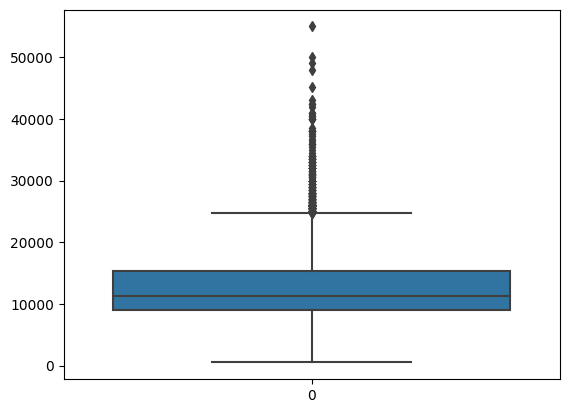

In [107]:
plot(df,'price')

In [110]:
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)

iqr = q3 - q1

maximum = q3 + 1.5*iqr
minimum=q1 - 1.5*iqr

In [111]:
maximum

24747.75

In [112]:
minimum

-450.25

In [127]:
len([price for price in df['price'] if price>40000 ])

0

In [118]:
import numpy as np

In [124]:
df['price']=np.where(df['price']>=40000,df['price'].median(),df['price'])

In [125]:
df

,model,year,price,mileage,tax,kmpl,engineSize,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Petrol,fuelType_Diesel,fuelType_Hybrid
17103,13,2003,495.0,177644,200,17.643,1.6,0,1,0,1,0,0
16904,13,2005,675.0,121000,235,16.921,2.0,0,1,0,1,0,0
14222,10,2005,675.0,97000,205,20.705,2.0,0,1,0,0,1,0
16811,10,2005,675.0,108000,260,15.390,1.8,0,1,0,1,0,0
16704,8,2008,694.0,82020,145,20.024,1.2,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12613,23,2019,11291.0,2500,145,9.396,5.0,1,0,0,1,0,0
17866,23,2020,11291.0,50,145,10.161,5.0,0,1,0,1,0,0
11910,23,2017,11291.0,7546,145,9.991,5.0,1,0,0,1,0,0
11913,23,2017,11291.0,21575,145,8.886,5.0,0,1,0,1,0,0


In [156]:
X =df.drop('price',axis = 1)
y=df['price']

In [157]:
from sklearn.feature_selection import mutual_info_regression

In [158]:
imp=mutual_info_regression(X,y)

In [159]:
imp_df=pd.DataFrame(imp,index=X.columns)

In [160]:
imp_df.columns=['importance']

In [161]:
imp_df.sort_values(by='importance',ascending=False)

,importance
kmpl,0.521136
year,0.509660
engineSize,0.354067
model,0.351904
mileage,0.290489
tax,0.278493
fuelType_Petrol,0.038774
transmission_Manual,0.035055
fuelType_Diesel,0.033276
transmission_Automatic,0.021550


In [162]:
from sklearn.model_selection import train_test_split

In [163]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.25, random_state=42)

In [165]:
from sklearn.ensemble import RandomForestRegressor

In [169]:
ml_model=RandomForestRegressor()

In [170]:
ml_model.fit(X_train , y_train)

RandomForestRegressor()

In [171]:
y_pred = ml_model.predict(X_test)

In [172]:
y_pred

array([ 6306.32, 11101.58,  8380.81, ..., 10150.05, 14696.12, 10783.84])

In [173]:
from sklearn import metrics

In [187]:
model_accuracy = metrics.r2_score(y_test,y_pred)

In [192]:
model_accuracy*100

91.94069487386001